## **importing data set**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Hotel Reservations (1).csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## **Checking null values**

In [ ]:
df.isnull().sum()

# **checking data types**

In [ ]:
df.info()

In [ ]:
df.drop_duplicates()

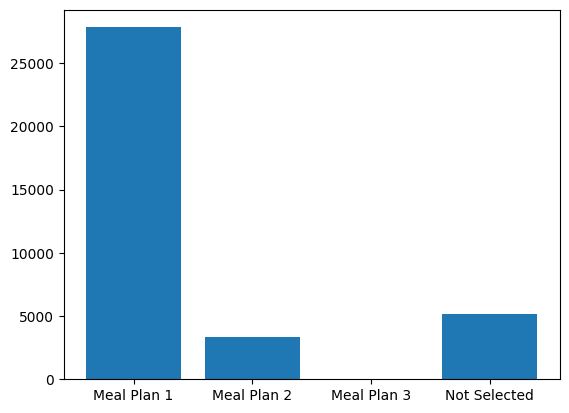

In [57]:
data=df.groupby('type_of_meal_plan')['booking_status'].count()
plt.bar(data.index,data.values)
plt.show()



In [58]:
df.groupby('room_type_reserved')['booking_status'].count()


,booking_status
room_type_reserved,
Room_Type 1,28130
Room_Type 2,692
Room_Type 3,7
Room_Type 4,6057
Room_Type 5,265
Room_Type 6,966
Room_Type 7,158


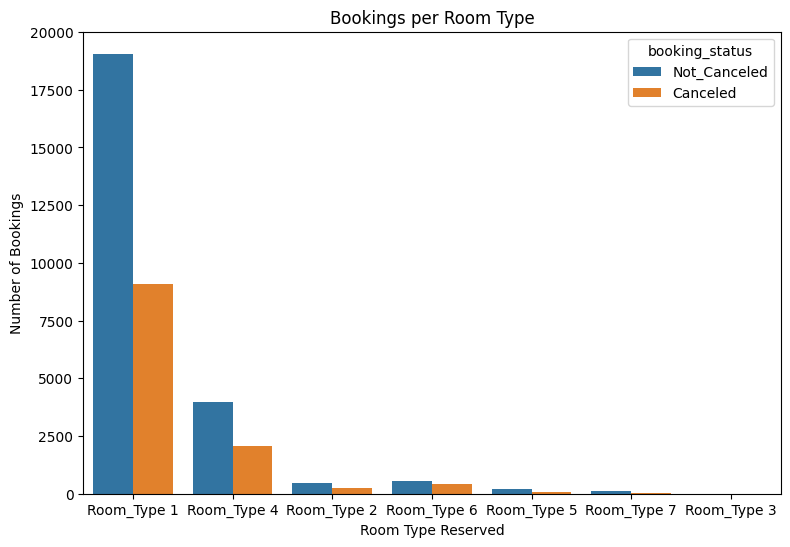

In [59]:
plt.figure(figsize=(9, 6))
sns.countplot(x='room_type_reserved', hue='booking_status', data=df)

plt.title('Bookings per Room Type')
plt.xlabel('Room Type Reserved')
plt.ylabel('Number of Bookings')
plt.show()

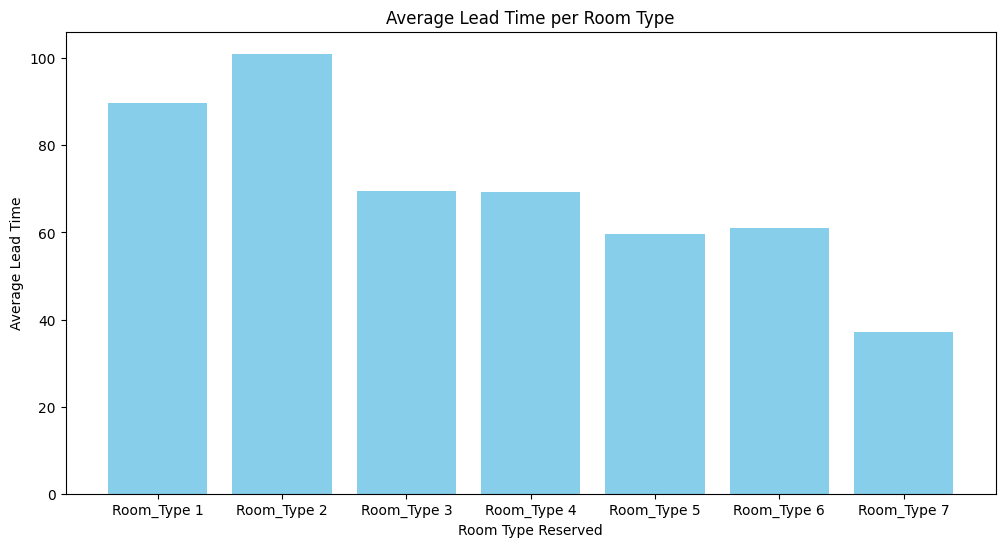

In [61]:
avg_leadtime = df.groupby('room_type_reserved')['lead_time'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(avg_leadtime['room_type_reserved'], avg_leadtime['lead_time'], color='skyblue')
plt.xlabel('Room Type Reserved')
plt.ylabel('Average Lead Time')
plt.title('Average Lead Time per Room Type')
plt.show()


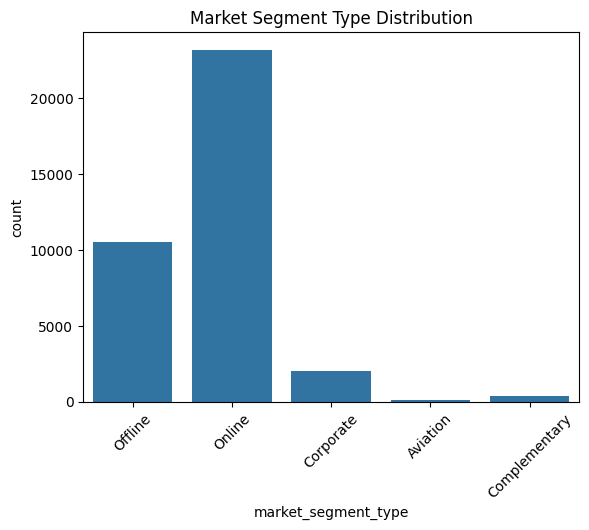

In [71]:
sns.countplot(data=df, x='market_segment_type')
plt.title('Market Segment Type Distribution')
plt.xticks(rotation=45)
plt.show()


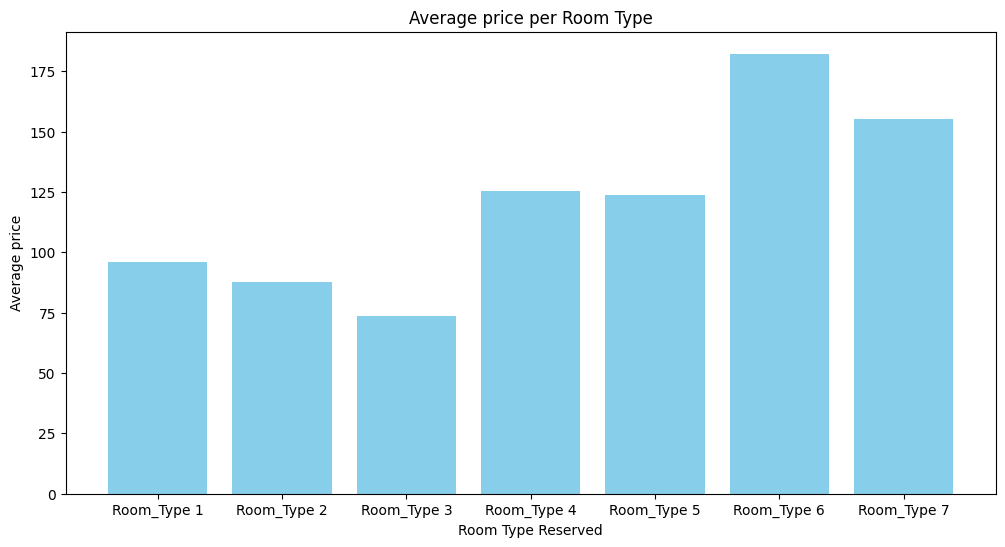

In [79]:
avg_price = df.groupby('room_type_reserved')['avg_price_per_room'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(avg_price['room_type_reserved'], avg_price['avg_price_per_room'], color='skyblue')
plt.xlabel('Room Type Reserved')
plt.ylabel('Average price')
plt.title('Average price per Room Type')
plt.show()

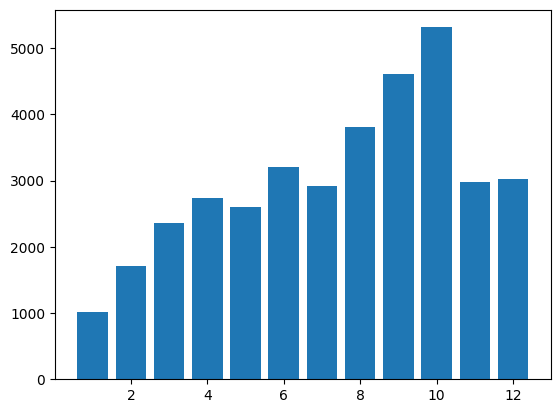

In [78]:
data=df.groupby('arrival_month')['booking_status'].count()
plt.bar(data.index,data.values)
plt.show()

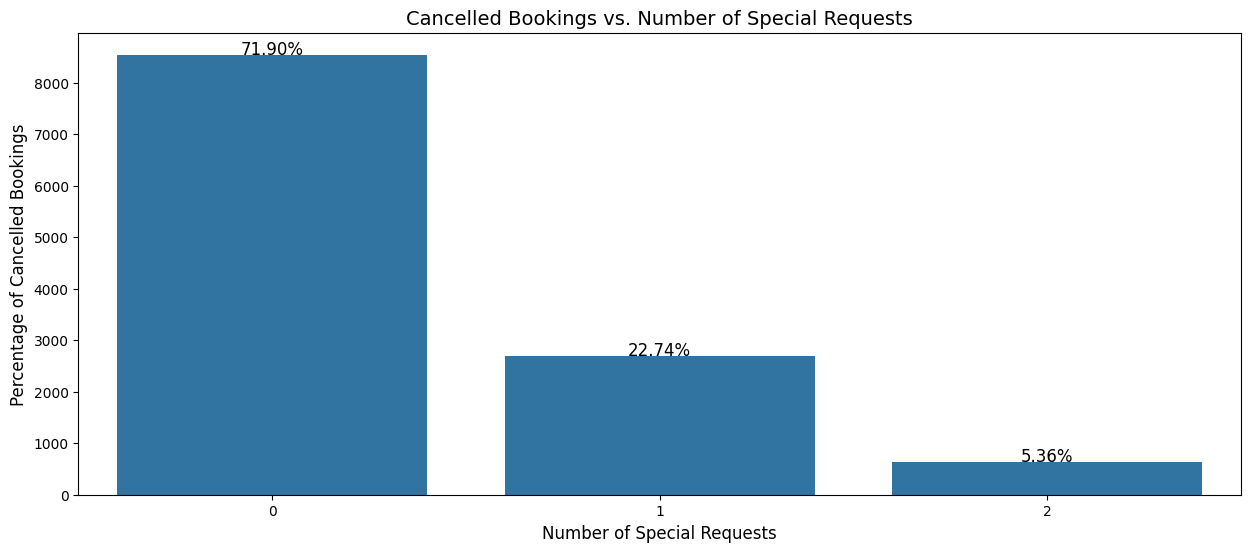

In [91]:

cancelled_data = df[df['booking_status'] == 'Canceled']

plt.figure(figsize=(15, 6))
sns.countplot(x='no_of_special_requests', data=cancelled_data)

total_cancelled = len(cancelled_data)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total_cancelled) * 100
    plt.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.2f}%',
             ha='center', fontsize=12)

plt.title('Cancelled Bookings vs. Number of Special Requests', fontsize=14)
plt.xlabel('Number of Special Requests', fontsize=12)
plt.ylabel('Percentage of Cancelled Bookings', fontsize=12)
plt.show()


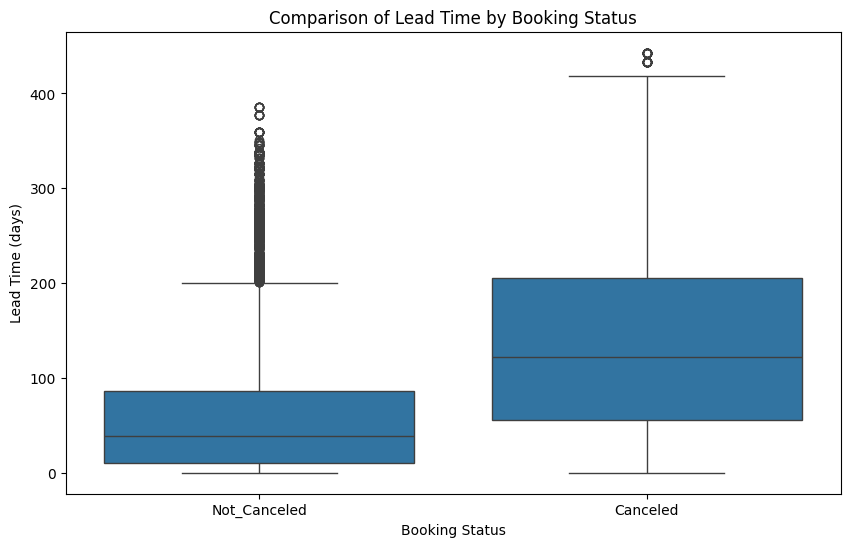

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.title('Comparison of Lead Time by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')

# Show the plot
plt.show()

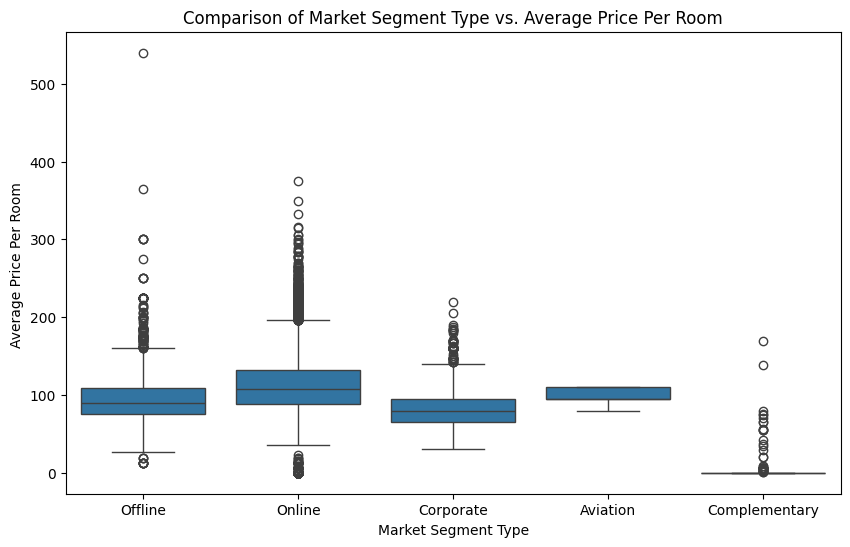

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=df)

plt.title('Comparison of Market Segment Type vs. Average Price Per Room')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price Per Room ')

plt.show()